# Projet Deep Neural Networks

## 2) Données

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io



In [75]:
bin_alpha_digits = scipy.io.loadmat('binaryalphadigs.mat')


In [76]:
bin_alpha_digits

{'__header__': b'MATLAB 5.0 MAT-file, Platform: LNX86, Created on: Wed May 30 13:33:43 2001',
 '__version__': '1.0',
 '__globals__': [],
 'dat': array([[array([[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [77]:
bin_alpha_digits = bin_alpha_digits['dat']

## 3) Fonctions élémentaires

### 3.1) Construction d'un RBM et test sur un 

In [78]:
def lire_alpha_digit(elements):
    """Fonction permettant de recuperer les données des alpha digits

    Args:
        elements (list): Indice des données que l'on souhaite recupérer

    Returns:
        np_array: array ayant len(elements)*39 lignes et 320 colonnes
    """
    X = []
    for elem in elements:
        for i in bin_alpha_digits[elem]:
            X.append(i.flatten())
    return np.array(X)


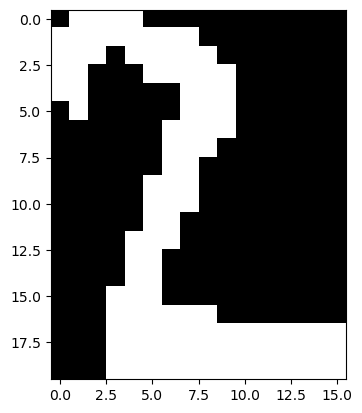

In [79]:
X = lire_alpha_digit([2])

image = X[0].reshape(20,16)
plt.imshow(image, cmap='gray')

In [84]:
class RBM :
    def __init__(self, n_visible, n_hidden):
        """ Constructeur de la classe RBM

        Args:
            n_visible (_type_): Nombre de neurones visibles
            n_hidden (_type_): Nombre de neurones cachés
        """
        self.W = np.random.normal(0, 0.1, (n_visible, n_hidden)) # initialisation des poids
        self.a = np.zeros(n_visible) # initialisation des biais visibles
        self.b = np.zeros(n_hidden) # initialisation des biais cachés

    def sigmoid(self, x):
        """Fonction d'activation sigmoid

        Args:
            x (float): valeur d'entrée

        Returns:
            float: valeur de sortie
        """
        return 1.0 / (1 + np.exp(-x))
    
    def entree_sortie(self, v):
        """Calcul de la sortie des neurones cachés

        Args:
            v (np_array): vecteur d'entrée

        Returns:
            np_array: vecteur de sortie
        """
        return self.sigmoid(np.dot(v, self.W) + self.b)
    
    def sortie_entree(self, h):
        """Calcul de la sortie des neurones visibles

        Args:
            h (np_array): vecteur d'entrée

        Returns:
            np_array: vecteur de sortie
        """
        return self.sigmoid(np.dot(h, self.W.T) + self.a)
    
    def train_RBM(self,X, n_epochs, learning_rate,batch_size):
        """Entrainement du RBM

        Args:
            X (np_array): données d'entrée
            n_epochs (int): nombre d'epochs
            learning_rate (float): taux d'apprentissage
            batch_size (int): taille des batchs
        """
        X_copy= X.copy()
        n = X_copy.shape[0]
        for epoch in range(n_epochs):
            np.random.shuffle(X_copy)
            for j in range(0, n, batch_size):
                X_batch = X_copy[j:min(j+batch_size, n)]
                tb = X_batch.shape[0]
                v0 = X_batch
                p_h_v_0 = self.entree_sortie(v0)
                h_0 = (np.random.rand(tb, self.b.shape[0]) < p_h_v_0).astype(int)
                p_v_h_0 = self.sortie_entree(h_0)
                v_1 = (np.random.rand(tb, self.a.shape[0]) < p_v_h_0).astype(int)
                p_h_v_1 = self.entree_sortie(v_1)

                self.W += learning_rate * (np.dot(v0.T, p_h_v_0) - np.dot(v_1.T, p_h_v_1)) / tb
                self.a += learning_rate * np.mean(v0 - v_1, axis=0)
                self.b += learning_rate * np.mean(p_h_v_0 - p_h_v_1, axis=0)
                
            H= self.entree_sortie(X_copy)
            reconstruction_error = np.mean(np.sum((X_copy - self.sortie_entree(H))**2, axis=1))

            # Print reconstruction error
            print(f"Reconstruction error at epoch {epoch} : {reconstruction_error}")



    def generer_image(self, n_iter, n_images):
        """Génération d'images

        Args:
            n_iter (int): nombre d'itérations
            n_images (int): nombre d'images à générer

        Returns:
            np_array: vecteur d'images générées
        """
        v = (np.random.rand(n_images, self.a.shape[0]) < np.random.rand(n_images, self.a.shape[0]) ).astype(int)
        for j in range(n_iter):
            h = (np.random.rand(n_images, self.b.shape[0]) < self.entree_sortie(v)).astype(int)
            v = (np.random.rand(n_images, self.a.shape[0]) < self.sortie_entree(h)).astype(int)
        return np.array(v)


In [82]:
rbm = RBM(320, 120)

X = lire_alpha_digit([3,10,32])

rbm.train_RBM(X, 100, 0.01, 100)



Reconstruction error at epoch 0 : 74.06443116745241
Reconstruction error at epoch 1 : 71.31282295148965
Reconstruction error at epoch 2 : 69.29843378416004
Reconstruction error at epoch 3 : 67.94515990345813
Reconstruction error at epoch 4 : 66.90940821564838
Reconstruction error at epoch 5 : 66.16257855199372
Reconstruction error at epoch 6 : 65.53294448991382
Reconstruction error at epoch 7 : 65.01799509083767
Reconstruction error at epoch 8 : 64.56849218732751
Reconstruction error at epoch 9 : 64.24056406069167
Reconstruction error at epoch 10 : 63.87365529787783
Reconstruction error at epoch 11 : 63.58594137752005
Reconstruction error at epoch 12 : 63.33214052992061
Reconstruction error at epoch 13 : 63.04336290544272
Reconstruction error at epoch 14 : 62.76251617993557
Reconstruction error at epoch 15 : 62.45133830752183
Reconstruction error at epoch 16 : 62.1316094589636
Reconstruction error at epoch 17 : 61.86439557912309
Reconstruction error at epoch 18 : 61.584365417105076
Rec

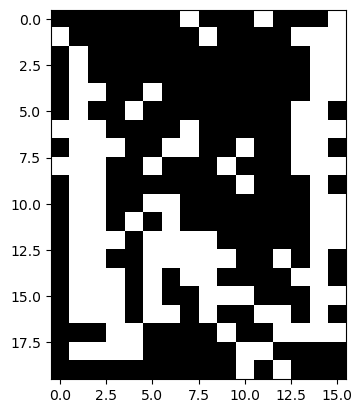

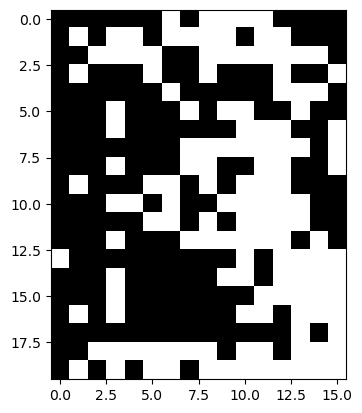

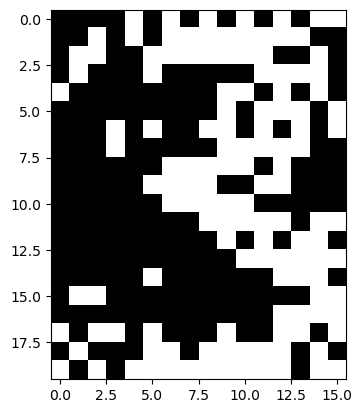

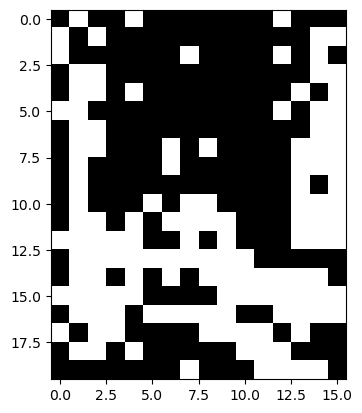

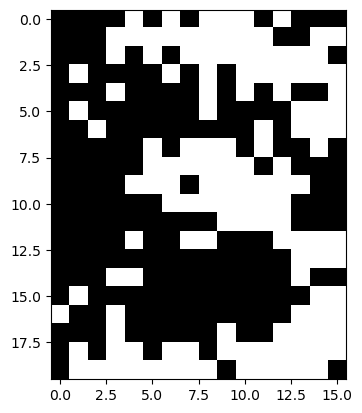

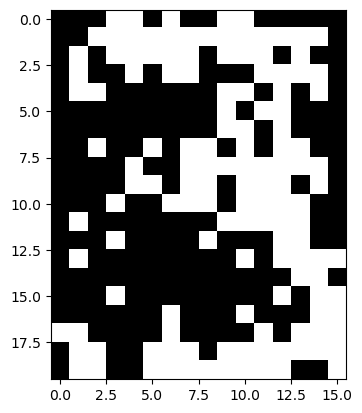

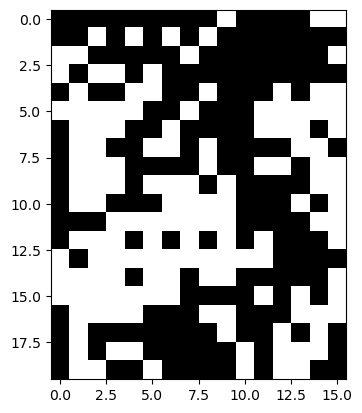

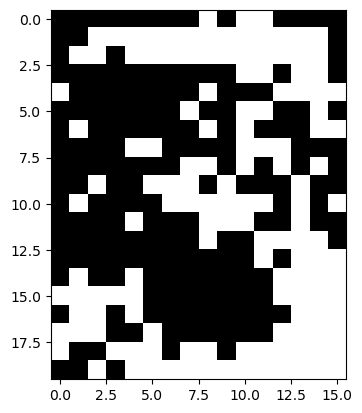

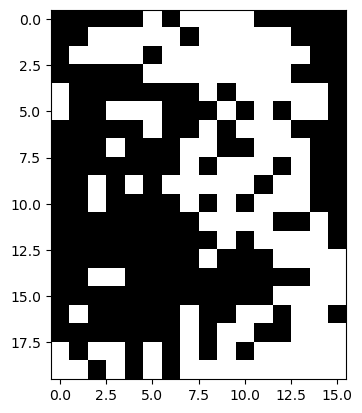

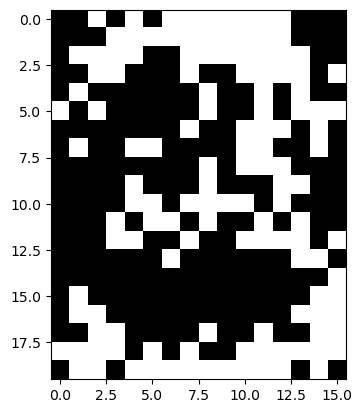

In [83]:
im = rbm.generer_image(100, 10)

for i in im:
    plt.imshow(i.reshape(20,16), cmap='gray')
    plt.show()

### 3.2) Construction d'un DBN et test sur binary alpha digits

In [85]:
class DBN:
    def __init__(self, couche):
        """initie la classe DBN

        Args:
            couche (list): Liste des couches du réseau 
        """
        self.n_layers = len(couche)
        self.rbms = [RBM(couche[i], couche[i+1]) for i in range(self.n_layers-1)]

    def train_DBN(self, X, n_epochs, learning_rate, batch_size,is_DNN = False):
        X_copy= X.copy()
        if not is_DNN:
            for i in range(self.n_layers-1):
                self.rbms[i].train_RBM(X_copy, n_epochs, learning_rate, batch_size)
                X_copy = self.rbms[i].entree_sortie(X_copy)
        else:
            for i in range(self.n_layers-2):
                self.rbms[i].train_RBM(X_copy, n_epochs, learning_rate, batch_size)
                X_copy = self.rbms[i].entree_sortie(X_copy)

    
    def generer_image(self, n_gibbs, n_images):
        """Génération d'images

        Args:
            n_iter (int): nombre d'itérations
            n_images (int): nombre d'images à générer

        Returns:
            np_array: vecteur d'images générées
        """
        v = (np.random.rand(n_images, self.rbms[self.n_layers-2].a.shape[0]) < np.random.rand(n_images, self.rbms[self.n_layers-2].a.shape[0]) ).astype(int)
        for j in range(n_gibbs):
            h = (np.random.rand(n_images, self.rbms[self.n_layers-2].b.shape[0]) < self.rbms[self.n_layers-2].entree_sortie(v)).astype(int)
            v = (np.random.rand(n_images, self.rbms[self.n_layers-2].a.shape[0]) < self.rbms[self.n_layers-2].sortie_entree(h)).astype(int)
        for i in range(self.n_layers-3, -1, -1):
            v = self.rbms[i].sortie_entree(v)
        return np.array(v)



In [86]:
dbn = DBN([320, 200, 100,100])
X = lire_alpha_digit([3,4])

dbn.train_DBN(X, 1000, 0.1, 8)

Reconstruction error at epoch 0 : 68.78742497782389
Reconstruction error at epoch 1 : 58.180364548682896
Reconstruction error at epoch 2 : 59.146642531139115
Reconstruction error at epoch 3 : 52.77882703668844
Reconstruction error at epoch 4 : 52.24776549559648
Reconstruction error at epoch 5 : 46.54951721060013
Reconstruction error at epoch 6 : 42.00682119501366
Reconstruction error at epoch 7 : 45.019634323374525
Reconstruction error at epoch 8 : 42.29496938073865
Reconstruction error at epoch 9 : 37.623132942060316
Reconstruction error at epoch 10 : 37.43202328547403
Reconstruction error at epoch 11 : 37.38360692004473
Reconstruction error at epoch 12 : 35.08234807852905
Reconstruction error at epoch 13 : 33.26656434531256
Reconstruction error at epoch 14 : 31.071454774096992
Reconstruction error at epoch 15 : 31.44697284709412
Reconstruction error at epoch 16 : 30.076982574135574
Reconstruction error at epoch 17 : 29.42477426950699
Reconstruction error at epoch 18 : 27.790661292276

In [124]:
print(len(dbn.rbms))
dbn.rbms[dbn.n_layers-2].W.shape


3


(100, 100)

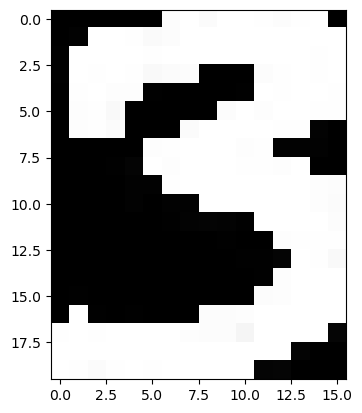

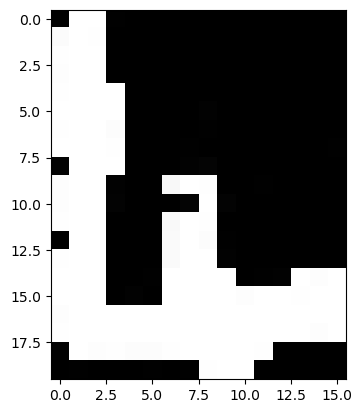

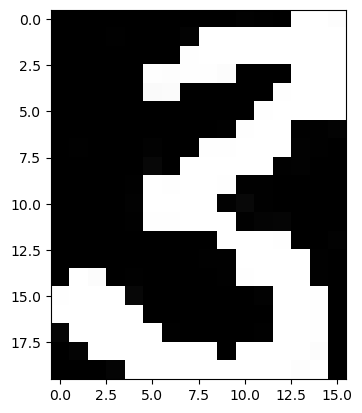

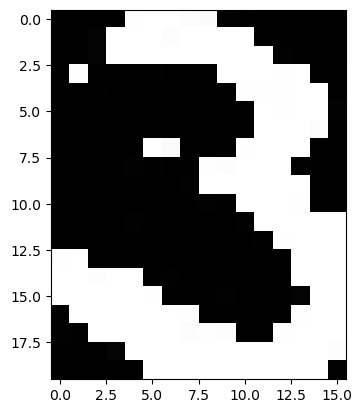

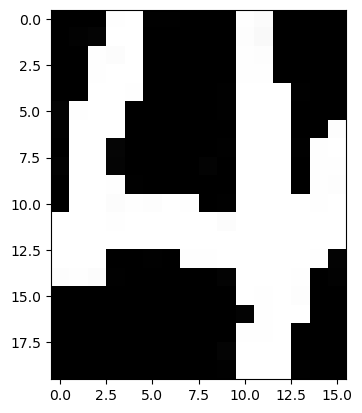

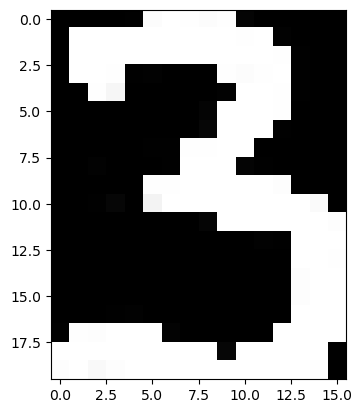

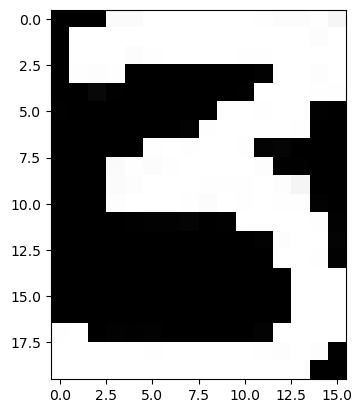

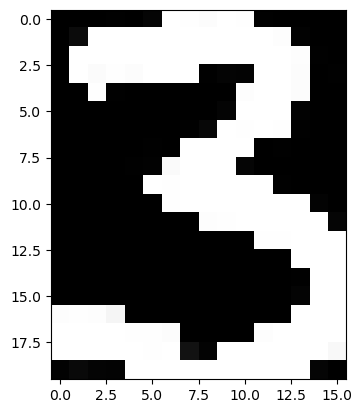

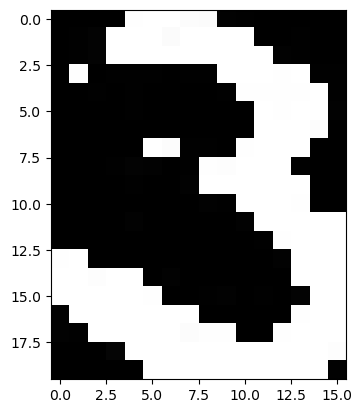

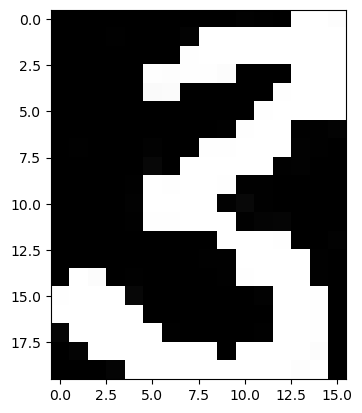

In [87]:
im = dbn.generer_image(100, 10)

for i in im:
    plt.imshow(i.reshape(20,16), cmap='gray')
    plt.show()

### 3.3) Construction d'un DNN et test sur Mnist

In [45]:
import copy

In [88]:
class DNN :
    def __init__(self, couche):
        """initie la classe DNN

        Args:
            couche (list): Liste des couches du réseau 
        """ 
        self.dbn = DBN(couche)
        
    
    def train_DNN(self, X, n_epochs, learning_rate, batch_size):
        self.dbn.train_DBN(X, n_epochs, learning_rate, batch_size)
    
    def calcul_softmax(self, X):
        """Calcul de la fonction softmax

        Args:
            X (np_array): données d'entrée

        Returns:
            np_array: vecteur de sortie
        """
        return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)

    def entree_sortie_reseau(self,X):
        """Calcul de la sortie du réseau

        Args:
            X (np_array): données d'entrée

        Returns:
            np_array: vecteur de sortie
        """
        L = [X]
        for rbm in self.dbn.rbms:
            X = rbm.entree_sortie(X)
            L.append(X)
        return L, self.calcul_softmax(L[-1])
    
    def retropropagation(self, X, Y, learning_rate,n_epochs,batch_size):
        """Rétropropagation

        Args:
            X (np_array): données d'entrée
            Y (np_array): données de sortie
            learning_rate (float): taux d'apprentissage
            n_epochs (int): nombre d'epochs
            batch_size (int): taille des batchs
        """
        X_copy= X.copy()
        for epoch in range(n_epochs):
            for j in range(0, X_copy.shape[0], batch_size):
                X_batch = X_copy[j:min(j+batch_size, X_copy.shape[0])]
                Y_batch = Y[j:min(j+batch_size, X_copy.shape[0])]
                tb = X_batch.shape[0]
                L, Y_hat = self.entree_sortie_reseau(X_batch)
                delta = Y_hat - Y_batch
                dbm_copy = copy.deepcopy(self.dbn)
                for i in range(self.dbn.n_layers-2, -1, -1):
                    dbm_copy.rbms[i].b -= learning_rate * np.mean(delta, axis=0)
                    dbm_copy.rbms[i].W -= learning_rate * np.dot(L[i].T, delta) / tb
                    delta = np.dot(delta, self.dbn.rbms[i].W.T) * L[i] * (1 - L[i])
                self.dbn = dbm_copy
            L, Y_hat = self.entree_sortie_reseau(X_copy)
            loss = -np.mean(Y * np.log(Y_hat))
            print(f"Loss at epoch {epoch} : {loss}")

    def test_DNN(self, X, Y):
        """Test du réseau

        Args:
            X (np_array): données d'entrée
            Y (np_array): données de sortie

        Returns:
            float: taux de réussite
        """
        _, Y_hat = self.entree_sortie_reseau(X)
        return np.mean(np.argmax(Y_hat, axis=1) == np.argmax(Y, axis=1))

In [89]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')


c:\Users\gertn\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [29]:
import pandas as pd

In [90]:
from sklearn.preprocessing import OneHotEncoder
# Extract the features and labels

X = mnist.data
y = mnist.target

X_bw = np.where(X > 127, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X_bw, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse=False)

y_train = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))

y_test = encoder.fit_transform(y_test.to_numpy().reshape(-1, 1))




c:\Users\gertn\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\gertn\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
y_test[0]

'8'

In [31]:
y[0]

5

pandas.core.series.Series

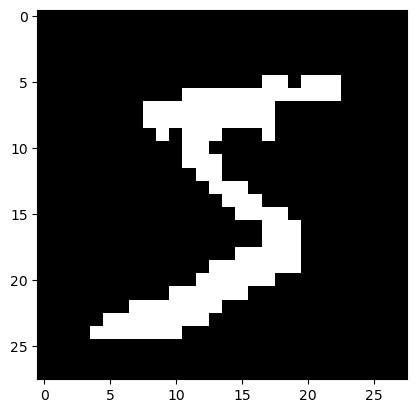

In [91]:
plt.imshow(X_bw[0].reshape(28, 28),cmap='gray')
plt.show()


In [94]:
dnn = DNN([784, 200, 100, 100, 10])


In [92]:
dnn.train_DNN(X_train[:6000], 300, 0.1, 8)



Reconstruction error at epoch 0 : 32.94489411954182
Reconstruction error at epoch 1 : 27.53214752159428
Reconstruction error at epoch 2 : 24.391339944927577
Reconstruction error at epoch 3 : 23.26299889807279
Reconstruction error at epoch 4 : 22.206502660819854
Reconstruction error at epoch 5 : 21.480673441349392
Reconstruction error at epoch 6 : 20.57830751927571
Reconstruction error at epoch 7 : 18.395996031084643
Reconstruction error at epoch 8 : 18.601919018301636
Reconstruction error at epoch 9 : 16.93426570180585
Reconstruction error at epoch 10 : 16.71279049566264
Reconstruction error at epoch 11 : 17.41678975587329
Reconstruction error at epoch 12 : 16.7633915485589
Reconstruction error at epoch 13 : 16.505130456958646
Reconstruction error at epoch 14 : 16.425654296667577
Reconstruction error at epoch 15 : 15.852601599157545
Reconstruction error at epoch 16 : 15.381399642434554
Reconstruction error at epoch 17 : 15.52150035030145
Reconstruction error at epoch 18 : 14.6890970855

In [95]:
dnn.retropropagation(X_train[1000:2000], y_train[1000:2000], 0.1, 100, 8)

Loss at epoch 0 : 0.23028233683062013
Loss at epoch 1 : 0.22969969542429514
Loss at epoch 2 : 0.22900166967809796
Loss at epoch 3 : 0.22788143559927848
Loss at epoch 4 : 0.2253039820388402
Loss at epoch 5 : 0.21714003094622003
Loss at epoch 6 : 0.20171063214088353
Loss at epoch 7 : 0.196940921063357
Loss at epoch 8 : 0.19555893493183962
Loss at epoch 9 : 0.1944080322757362
Loss at epoch 10 : 0.19360672229459533
Loss at epoch 11 : 0.19271528063320373
Loss at epoch 12 : 0.19315500986049614
Loss at epoch 13 : 0.19302721003001985
Loss at epoch 14 : 0.19323903036767565
Loss at epoch 15 : 0.19166593327369716
Loss at epoch 16 : 0.19023361912168557
Loss at epoch 17 : 0.1912955430456596
Loss at epoch 18 : 0.19603860616696053
Loss at epoch 19 : 0.19905869360187714
Loss at epoch 20 : 0.19141501609102704
Loss at epoch 21 : 0.19152185485405834
Loss at epoch 22 : 0.1890956576283177
Loss at epoch 23 : 0.18869789071291157
Loss at epoch 24 : 0.18865173052625028
Loss at epoch 25 : 0.19008250949386388
Lo

C:\Users\gertn\AppData\Local\Temp\ipykernel_30984\10661923.py:22: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))


Loss at epoch 37 : 0.18710318244808094
Loss at epoch 38 : 0.18900251495222536
Loss at epoch 39 : 0.18765288254895243
Loss at epoch 40 : 0.18660859042972175
Loss at epoch 41 : 0.18746960907253513
Loss at epoch 42 : 0.18864093336014265
Loss at epoch 43 : 0.18818824915035623
Loss at epoch 44 : 0.18752355261122353
Loss at epoch 45 : 0.1882456579924507
Loss at epoch 46 : 0.1893042734808223
Loss at epoch 47 : 0.18878747545566435
Loss at epoch 48 : 0.1892333265563884


KeyboardInterrupt: 